In [1]:
import numpy as np

import librosa

import scipy.io.wavfile

import senmf

import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/home/gsmith/work/senmf/lib/python2.7/site-packages/librosa/core.py:26: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  'Falling back to scipy.signal')


### Compute a Spectrogram

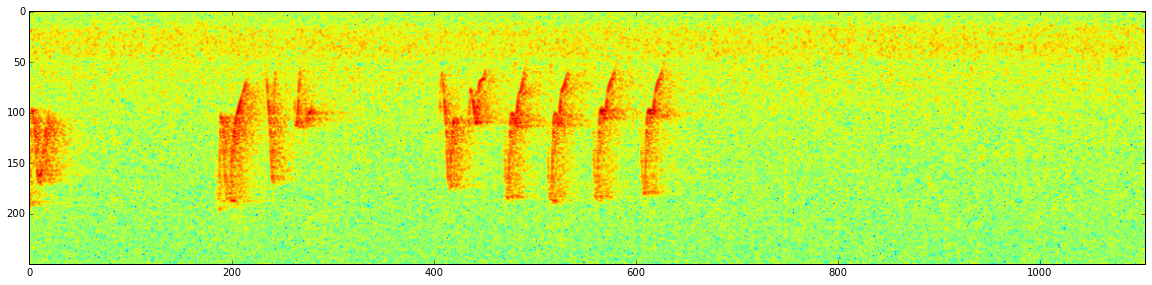

In [2]:
sr, x = scipy.io.wavfile.read('data/bird-songs.wav')
stft = librosa.stft(x, n_fft=1024, hop_length=200).T

X = np.abs(stft)[:,:250]
figure(figsize=(20,5))
imshow(np.log(X.T))

### Decompose the Spectrogram

In [3]:
nmf = senmf.SENMF(n_bases=5, window_width=15, X=X)
nmf.rand_D()
nmf.rand_A()

array([[ 2.71212163,  2.17251496,  2.92351264, ...,  2.75217895,
         2.5688112 ,  2.45168167],
       [ 2.67476164,  2.25592663,  2.29493153, ...,  2.97359829,
         2.45770561,  2.65079422],
       [ 2.6982269 ,  2.80444716,  2.73932187, ...,  2.13502697,
         2.6224626 ,  2.55828523],
       [ 2.21214374,  2.5277418 ,  2.64885006, ...,  2.29196056,
         2.02979824,  2.83732419],
       [ 2.66259971,  2.31665886,  2.08767807, ...,  2.60522612,
         2.91654819,  2.87148187]])

In [4]:
def any_neg(arr):
    neg = arr < 0.0
    return any(list(itertools.chain.from_iterable(neg.tolist())))

In [5]:
%time nmf.fit(5)

CPU times: user 669 ms, sys: 173 ms, total: 842 ms
Wall time: 841 ms


senmf.py:45: RuntimeWarning: divide by zero encountered in divide
  return self.X / np.abs(self.reconstruct())
senmf.py:63: RuntimeWarning: invalid value encountered in divide
  U_D = np.einsum("jn,ni->ji", self.A[:,:-t_prime or None]/np.atleast_2d(self.A[:,:-t_prime or None].sum(axis=1)).T, self.R[t_prime:])
/usr/local/lib/python2.7/site-packages/scipy/signal/signaltools.py:357: RuntimeWarning: invalid value encountered in multiply
  rfftn(in2, fshape), fshape)[fslice].copy()


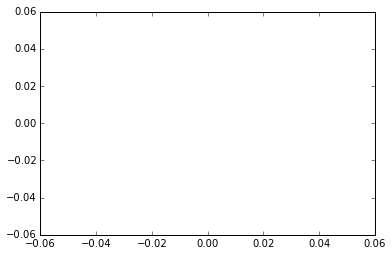

In [6]:
plot(nmf.A.T)

/usr/local/lib/python2.7/site-packages/numpy/ma/core.py:3900: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


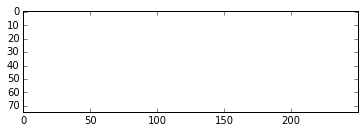

In [7]:
(x,y,z) = nmf.D.shape
imshow(np.log(nmf.D.reshape(x*y, z)))

### Inspect Decomposition

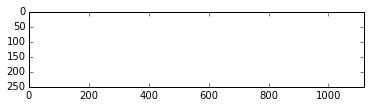

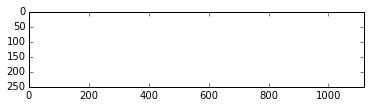

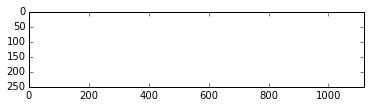

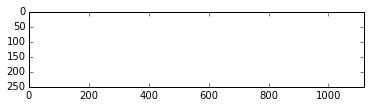

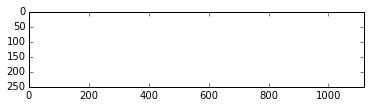

In [8]:
for i in range(nmf.n_bases):
    figure()
    imshow(nmf.reconstruct_basis(i))

#### Show the estimate

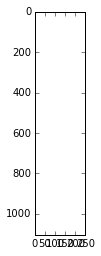

In [9]:
X_bar = nmf.reconstruct()
imshow(np.log(X_bar))

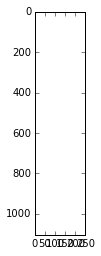

In [10]:
imshow(np.log(X-X_bar))

#### Show the activations

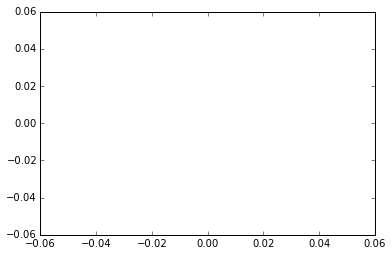

In [11]:
plot(nmf.A.T)

#### Show the basis windows


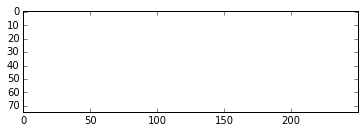

In [12]:
(x,y,z) = nmf.D.shape
imshow(np.log(nmf.D.reshape(x*y, z)))